# pH-rate Profile for Esters

In wqater esters have three possible routes to hydrolysis. 

1. Water attacks the carbonyl group of the ester.
2. Acid catalysis: Water attacks the protonated carbonyl group of the ester.
3. Base catalysis: Hydroxide attacks the carbonyl group of the ester

Let us explore analyzing data for ester hydrolysios

This workbook contains the code and imports the data from multiple files and fits the data to the model..

The data being plotted is from "The Hydrolysis of Diclofenac Esters: Synthetic Prodrug Building Blocks for Biodegradable Drug–Polymer Conjugates." Feng Wang, Joshua Finnin et al., *J. Pharm. Sci.*, **2016**, *105*, 773-785.  https://doi.org/10.1002/jps.24665

The data is found in tables within the supplementary material at https://ars.els-cdn.com/content/image/1-s2.0-S0022354915001550-mmc1.docx


## Setup Tools and Read Data Table

Here the data table is read in and processed. Also the libraries are imported and any functions defined

In [1]:
### SETUP

!pip install uncertainties
!pip install lmfit
!mkdir plots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.optimize import curve_fit

import uncertainties as un
from uncertainties import unumpy as unp

import lmfit

github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_19/data/"
github_location = "data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"



mkdir: plots: File exists


## Read Data

Read the data in from the csv text file.

In [2]:
### READ DATA

data_file = "3ab.csv"
data_file = "3c.csv"
data_file = "4_1.csv"   # 4_1,2,3,4,5 and 9 available

df = pd.read_csv(github_location + data_file, 
             delimiter = ",", 
             skipinitialspace=True, 
 #            index_col="pH", 
             comment = "#") 

display(df)


,pH,log(k /s)
0,0.426829,-6.211604
1,0.825203,-6.552901
2,1.138211,-6.771331
3,2.162602,-7.153584
4,3.044715,-7.235495
5,4.012195,-7.071672
6,5.008130,-7.139932
7,6.032520,-6.948805
8,7.398374,-6.061433
9,8.308943,-5.269625


## Plot Data

This code will quickly plot the data. We idenify the columns we want to use for $x$ and $y$ and then call the plot function.

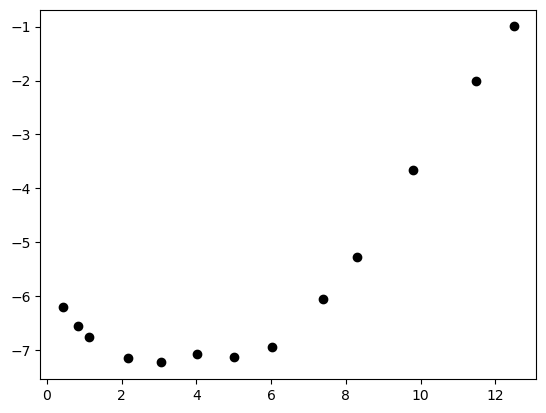

In [4]:
x = df["pH"]
#y = np.log10(df["k1 (10-5 hr-1)"] *1E-5)
y = df["log(k /s)"]

plt.plot(x,y, "ko")
plt.show()


## Fit To a Model

Modify the code below to use a model and get best-fit parameters for your data.

(1.4146+/-0.1354)e-06
(6.8496+/-0.4166)e-08
(1.3193+/-0.0728)e+00


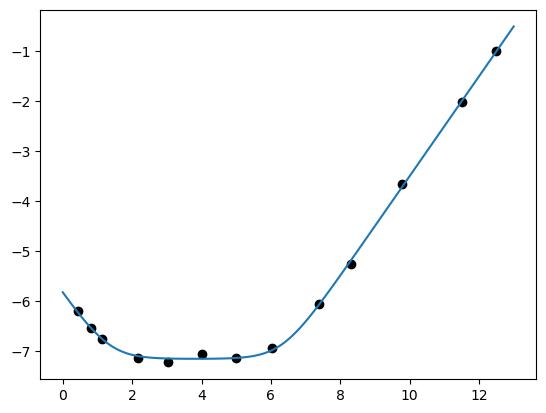

In [9]:
#######################################################
### DEFINE FUNCTIONS FOR EACH MODEL
#######################################################

def line1(x, int):
    ### slope set to -1. We are fitting only for the intercept.
    y = x * -1 + int
    return y

def line2(x, int):
    ### slope set to +1. We are fitting only for the intercept.
    y = x * 1 + int
    return y

def model2(pH, kHKa, kOH):
    ### Two parameter model for acid and base catalysis
    H = 10**(-pH)
    Kw = 10**-13.621
    k1 = kHKa * H
    k2 = kOH * Kw/H
    kobs = k1 + k2
    return np.log10(kobs)
     
def model3(pH, kHKa, kH2O, kOH):
    ### Three parameter model for acid and base catalysis plus water rate
    H = 10**(-pH)
    Kw = 10**-13.621
    k1 = kHKa * H
    k2 = kOH * Kw/H
    kobs = k1 + k2 + kH2O
    return np.log10(kobs)

#######################################################
### PLOT DATA
#######################################################
x = df["pH"]
# y = np.log10(df["k1 (10-5 hr-1)"] *1E-5)
y = df["log(k /s)"]
plt.plot(x,y, "ko")

m = model3

#######################################################
### FIT DATA TO MODEL
#######################################################

popt,pcov = curve_fit(m, x, y)

#######################################################
### COLLECT RESULTS AND PRINT
#######################################################

popt_uncertain = un.correlated_values(popt,pcov)

for p in popt_uncertain:    # print all results from curve fit
    print(f"{p:0.4e}")

#######################################################
### Plot BEST FIT LINE
#######################################################

x1 = np.linspace(0,13,100)  # make 100 points between 1 and 8 for x-axis
y1 = m(x1, *popt)     # calculate y values for those 100 x values

plt.plot(x1, y1)           # plot the calculated line
plt.show()